In [1]:
import pandas as pd                                                          # Data manipulation
import seaborn as sns                                                        # Data visualization
import matplotlib.pyplot as plt                                              # Data visualization

from sklearn.ensemble import RandomForestClassifier                          # Random Classifier 
from sklearn.neural_network import MLPClassifier                             # Neural Network
from sklearn.dummy import DummyClassifier                                    # Classifier to be compared with the Neural Network

from sklearn.metrics import confusion_matrix, classification_report          # Report about classification precision
from sklearn.preprocessing import StandardScaler, LabelEncoder               # Preprocessing 
from sklearn.model_selection import train_test_split                         # Split data

from sklearn.datasets import load_iris                                       # Data set Iris
from tensorflow.keras.utils import to_categorical           
%matplotlib inline

2024-07-23 00:19:39.449872: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 00:19:39.533916: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 00:19:39.643727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 00:19:39.733643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 00:19:39.757326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 00:19:39.877677: I tensorflow/core/platform/cpu_feature_gu

# Loading dataset Iris

X are the values that represent the parameters or variables. 
4 metrics in [cm]sepal and petal with and length.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
species = iris.target_names # Get species established

## Displaying Current Data, Human Friendly

THe following pot will combine the different metrics and groups the species associated.
This visualization is made to understand better the nature of the data set.

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)             # Oranize data to be displayed 
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Use species name instead of numerical value

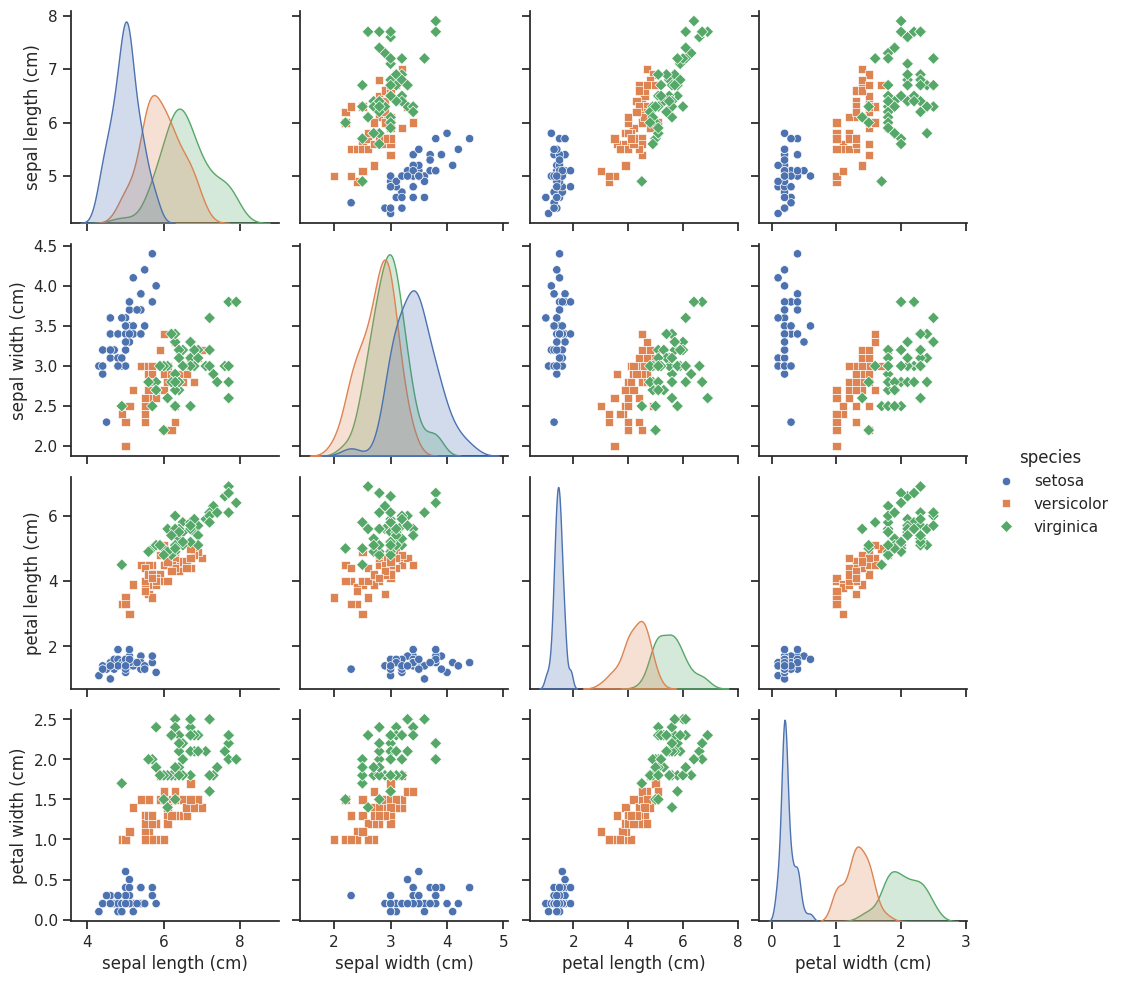

In [4]:
sns.set(style="ticks")

pairplot = sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

# Display the plot
plt.show() 

# Display the combination of the 4 varialbesm, each group represents an specie.

Part of the data set is going yto be used as training set, and the remaining is used for test prediction.

In [5]:
# split the data to be used as train and test, taking the 20 as test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

Normalize data to ensure every variable contains same order values and avoid bias.

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Normalize data to avoid bias
X_test = scaler.transform(X_test)       # Normalize data to avoid bias

## Classifier dummy for to be compared with a Neural Network.

Usign a dummy classifier that does not consider the input value with a Neural Network.
[Dummy](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [7]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_history = dummy_clf.fit(X_train, y_train)

In [8]:
pred_dummy = dummy_clf.predict(X_test)   

The next table table will focus on the performance, specially in precision column

In [9]:
# Model Performance
print(classification_report(y_test, pred_dummy, target_names=iris.target_names, zero_division=0))

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.30      1.00      0.46         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



<mark>Using the previous classifier (dummy), it show that it could not predict any value passed.</mark>

## Classifier using Neural Network (MLPC)

MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. [MLPC](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [10]:
mlpc_clf = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500, random_state=42, solver='sgd', learning_rate_init=0.01)
mlpc_hisotry = mlpc_clf.fit(X_train, y_train)
pred_mlpc = mlpc_clf.predict(X_test)

In [11]:
# Model Performance
print(classification_report(y_test, pred_mlpc, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



<mark>The presicion shows that virginica is the specie that represented more difficulty to be classified correctly</mark>

## Showing the learning curve method to describe the accuary in every iteration for MLPC 

[Learning curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). 

Determines cross-validated training and test scores for different training set sizes.

A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

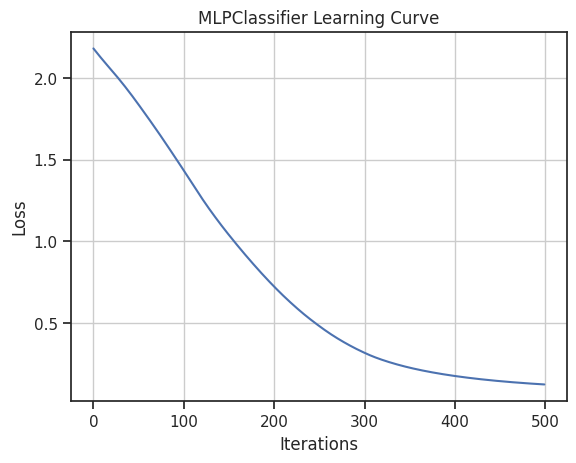

In [85]:
plt.plot(mlpc_clf.loss_curve_)
plt.title('MLPClassifier Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

<mark>The next example will use less layers and less iteration</mark>

In [13]:
model_underfit = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=200, random_state=42, solver='sgd', learning_rate_init=0.01)
model_underfit.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5, 5), learning_rate_init=0.01,
              random_state=42, solver='sgd')

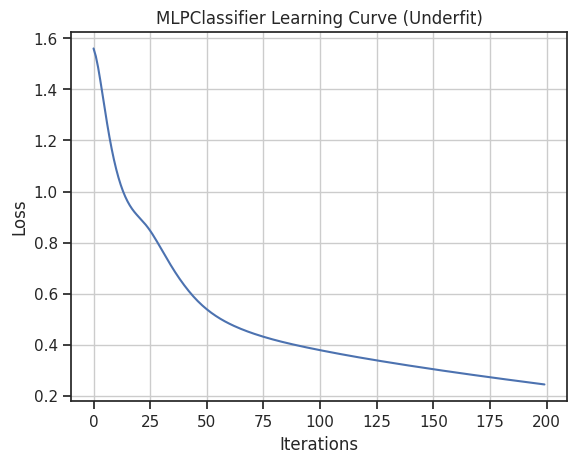

In [14]:
plt.plot(model_underfit.loss_curve_)
plt.title('MLPClassifier Learning Curve (Underfit)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Questions:

### IS  your model underfitting or overfitting ?
- Answer: The proposed solution is considered balanced, since the predictions are not affected by the noise (overfitting), and its complexity lets capture underlying patterns (Underfitting).

### Which is expected as performance of a random classifier, i.e a model that chose a class at random?
- Based on the usage of Dummy Model, that it does not consider the input provided, the expectation is that the precission will not provide any good result in order to predict the species.

### How your model is compared to a ramdom classifier?
- Using the classficiation report we can see for every type of specie how was the pression achieved for every model. Therefore the MLPC model adjust appropiately to the predictions.

### If you have more time, how would you expand or modified your model to making better?

- Increase the dataset, having more registrations to ensure working not only with a max of 100 samples will impact positevily the model.
- Evaluate other strategies to normalize the data in order to reduce indirect bias during training and prediction.
- Improve presicion for the variables: meassuring the width and length in a scale of milimeters can reduce the noise in order to provide classification.
- 